# Project Foundations for Data Science: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/ML and AI MIT LEARNING/Foundation of Data Science/EDA project-foodhub/foodhub_order.csv')

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [ ]:
#checking the shape of data
df.shape


(1898, 9)

#### Observations: There are 1898 rows and 9 columns in the foodhub dataframe


In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are attributes of different types (int, float, object) in the data.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
cat_cols =  ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

Shake Shack                              219
The Meatball Shop                        132
Blue Ribbon Sushi                        119
Blue Ribbon Fried Chicken                 96
Parm                                      68
RedFarm Broadway                          59
RedFarm Hudson                            55
TAO                                       49
Han Dynasty                               46
Blue Ribbon Sushi Bar & Grill             44
Nobu Next Door                            42
Rubirosa                                  37
Sushi of Gari 46                          37
Momoya                                    30
Five Guys Burgers and Fries               29
Blue Ribbon Sushi Izakaya                 29
Bareburger                                27
Tamarind TriBeCa                          27
Jack's Wife Freda                         25
Sushi of Gari Tribeca                     24
Chipotle Mexican Grill $1.99 Delivery     23
The Smile                                 18
ilili Rest

In [ ]:
# explore why reastaurant name have object dtype:
df['restaurant_name'].apply(type).value_counts()

<class 'str'>    1898
Name: restaurant_name, dtype: int64

#### Observations:
There is no missing/blank values in the data, but there are 736 orders without given any rate.

In [ ]:
# Write your codes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:



The minimun time it takes for food to be prepared is 20 minutes.
In average, it takes 27.37 minutes for food to be prepared.
The maximum time taken for food to be prepared is 35 minutes.

In [ ]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: There are 736 orders are not rated.


In [ ]:
df_copy = df.drop(['customer_id', 'order_id'], axis=1)

In [ ]:
#replace the 'Not Given' with Nan in rating
df_copy['rating'] = df_copy['rating'].replace('Not given',np.nan)

In [ ]:
df_copy['rating'].apply(type).value_counts()

<class 'str'>      1162
<class 'float'>     736
Name: rating, dtype: int64

In [ ]:
df_copy['rating']=df_copy['rating'].astype(float)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   restaurant_name        1898 non-null   object 
 1   cuisine_type           1898 non-null   object 
 2   cost_of_the_order      1898 non-null   float64
 3   day_of_the_week        1898 non-null   object 
 4   rating                 1162 non-null   float64
 5   food_preparation_time  1898 non-null   int64  
 6   delivery_time          1898 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 103.9+ KB


### Exploratory Data Analysis (EDA)

### Univariate Analysis

**First check the distribution for numerical columns.**

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def histogram_boxplot(feature, figsize=(10, 5), bins="auto"):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (10, 5))
    bins: number of bins (default "auto")
    """
    f, (ax_box, ax_hist) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid
        sharex=True,  # The X-axis will be shared among all the subplots
        gridspec_kw={"height_ratios": (.25, .75)},
        figsize=figsize
    )

    # Creating the subplots
    # Boxplot will be created and the mean value of the column will be indicated using some symbol
    sns.boxplot(x=feature, ax=ax_box, showmeans=True, color='lightblue')

    # For histogram
    sns.histplot(x=feature, kde=False, ax=ax_hist, bins=bins)
    ax_hist.axvline(np.mean(feature), color='g', linestyle='--')      # Add mean to the histogram
    ax_hist.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

    plt.show()

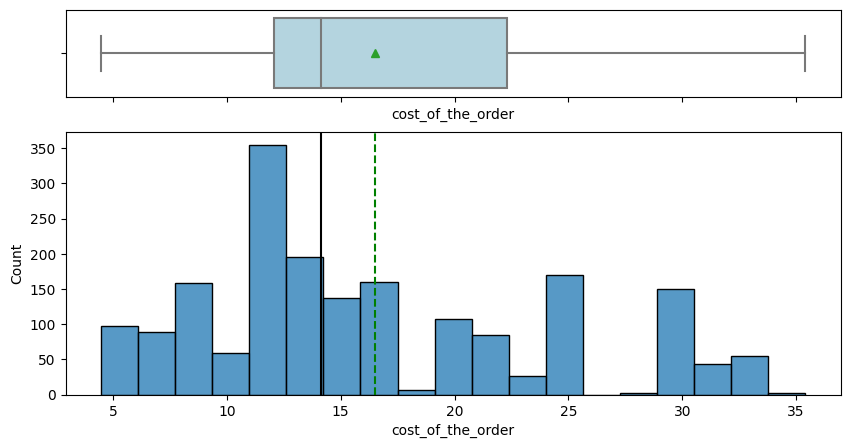

In [ ]:
histogram_boxplot(df_copy['cost_of_the_order'])

**Observations:**
* We observe that the distribution of the cost of the order is skewed to the right.
* We do not see outliers in this variable.
* We observe that most orders cost between \$11 to \$12, the min of the cost of order is \$4.5, the max value is around \$35.5, on average the cost of the order is about \$16.5. Although the boxplot did not indicate outliers, tere are a number of orders with cost much higher than the typical order cost.

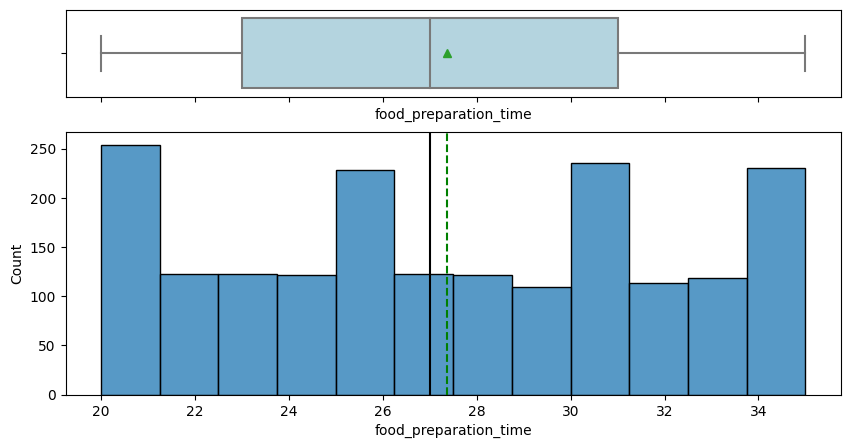

In [ ]:
histogram_boxplot(df_copy['food_preparation_time'])

**Observations:**
* We observe that the food preparation time is approximately uniform distribution, with mean preparation time of around 27.5 minutes.
* We do not see outliers in this variable.
* We observe that although most orders have equally likely preparation time between 22 minutes and 33 minutes.There are more orders needed to be prepared for 20-21 minitues, 25-26 minutes,30-31 minutes and over 34 minutes.

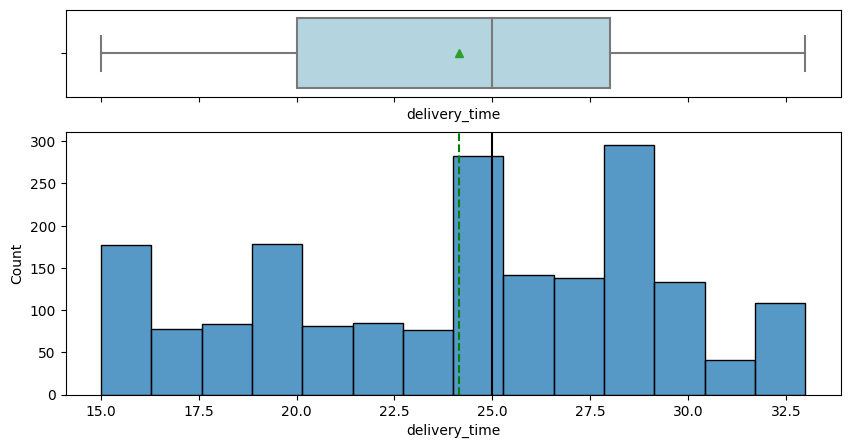

In [ ]:
histogram_boxplot(df_copy['delivery_time'])

**Observations:**
* We observe that the food delivery time is skewed to the left.
* We do not see outliers in this variable.
* We observe that the delivery time ranges from 15 minutes to 32.5 minutes, with the mean of 24 minutes and median of 25 minutes. Most orders need 28 to 29 minutes to deliver, but there are a number of orders deliver faster than typical delivery time.


In [ ]:
# replace Nan in rating with numbers
df_copy['rating'].fillna(0,inplace = True)
df_copy['rating'].unique()

array([0., 5., 3., 4.])

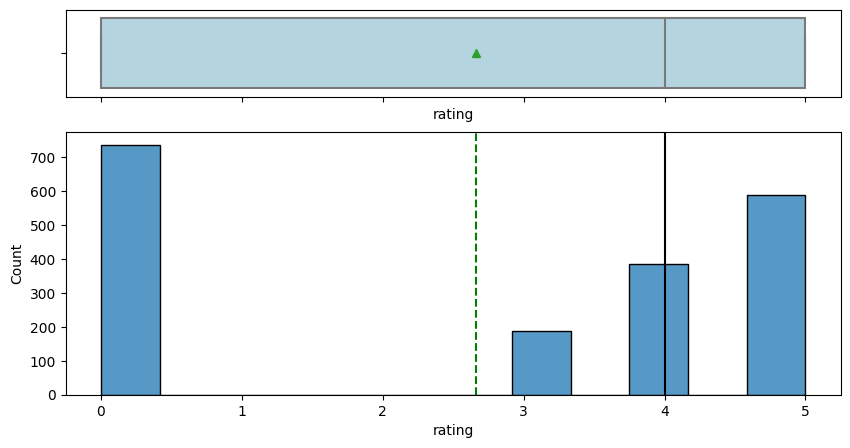

In [ ]:
histogram_boxplot(df_copy['rating'])

### Observation on restaurant_name, cuisine_type and days_of_the_week

In [ ]:
popPlace = df_copy['restaurant_name'].value_counts().nlargest(10)
popPlace

Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64

In [ ]:
#for categorial variables:

def bar_perc(data, z):
    total = len(data[z]) # Length of the column
    plt.figure(figsize = (15, 5))

    # Convert the column to a categorical data type
    data[z] = data[z].astype('category')

    ax = sns.countplot(x=z, data=data, palette='Paired', order=data[z].value_counts().head(14).index)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total) # Percentage of each class
        x = p.get_x() + p.get_width() / 2 -0.03           # Width of the plot
        y = p.get_y() + p.get_height()  + 6                      # Height of the plot
        ax.annotate(percentage, (x, y), size = 12)                  # Annotate the percentage



In [ ]:
df_popPlace = df_copy[df_copy['restaurant_name'].isin(popPlace.index)]
df_popPlace.head()

,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time
3,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
6,The Meatball Shop,Italian,6.07,Weekend,0.0,28,21,49
12,Blue Ribbon Fried Chicken,American,24.30,Weekend,5.0,23,17,40
15,Shake Shack,American,16.20,Weekend,5.0,33,25,58
18,RedFarm Hudson,Chinese,14.12,Weekend,4.0,25,24,49


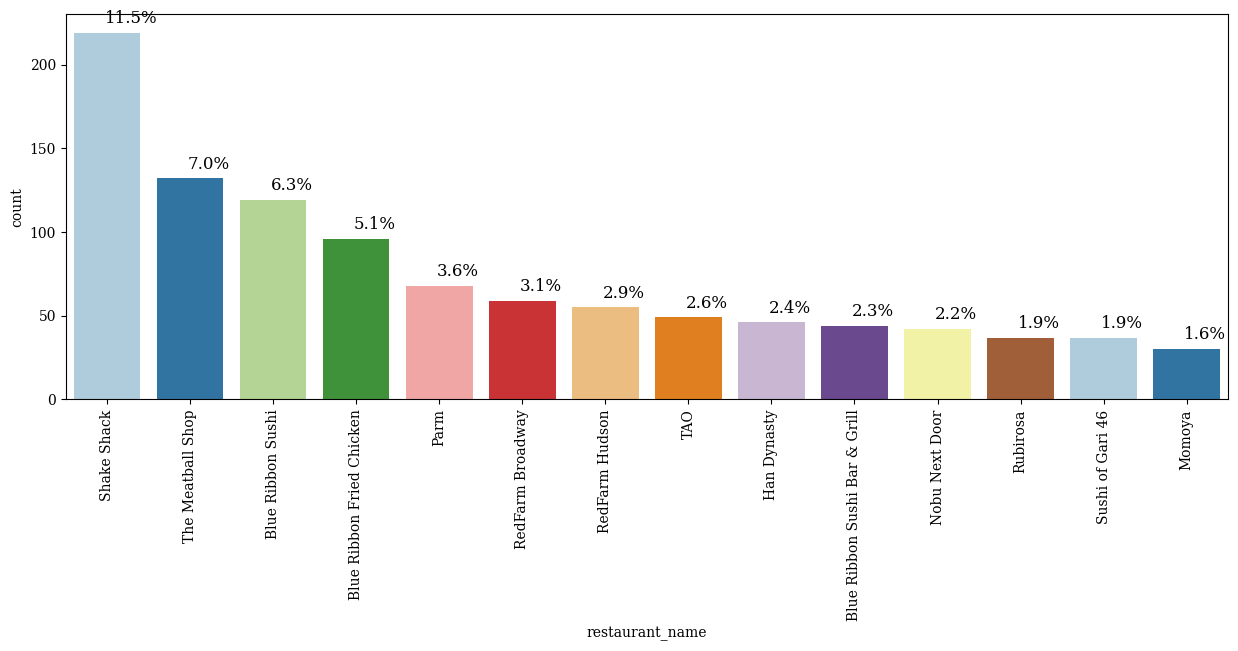

In [ ]:
bar_perc(df_copy,'restaurant_name')
plt.xticks(rotation=90)
plt.show()

**Observations:**
* We observe the most popular restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi,Blue Ribbon Fried Chicken and Parm.

In [ ]:
catCol = ['restaurant_name', 'cuisine_type', 'day_of_the_week','rating']

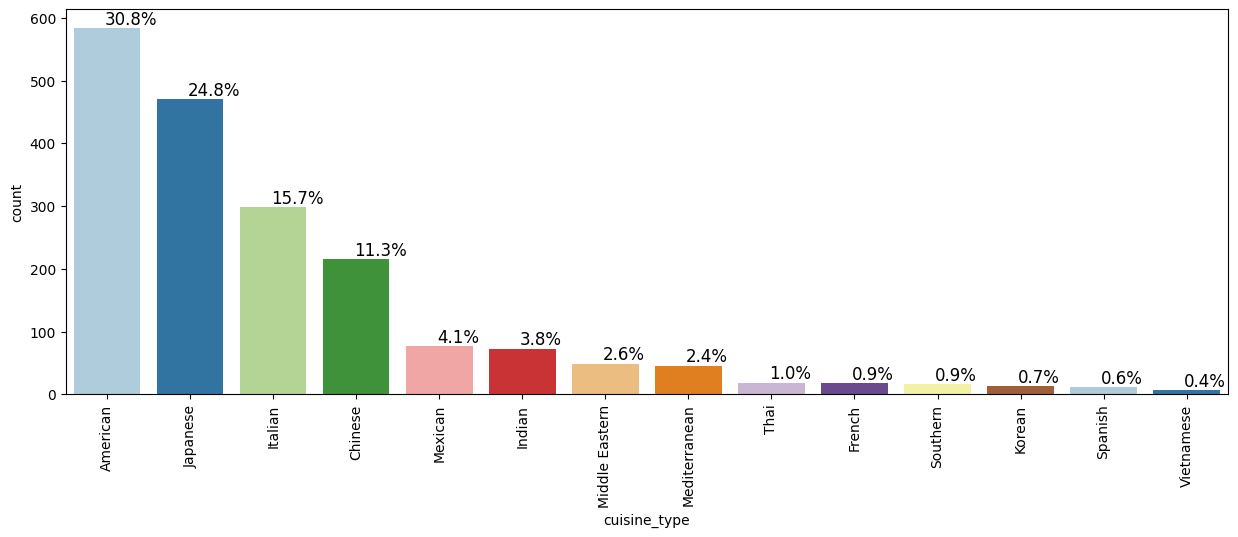

In [ ]:
bar_perc(df_copy,'cuisine_type')
plt.xticks(rotation=90)
plt.show()

**Observation:**
* We observe the most popular cuisines are American, Japanese, Italian and Chinese cuisine.

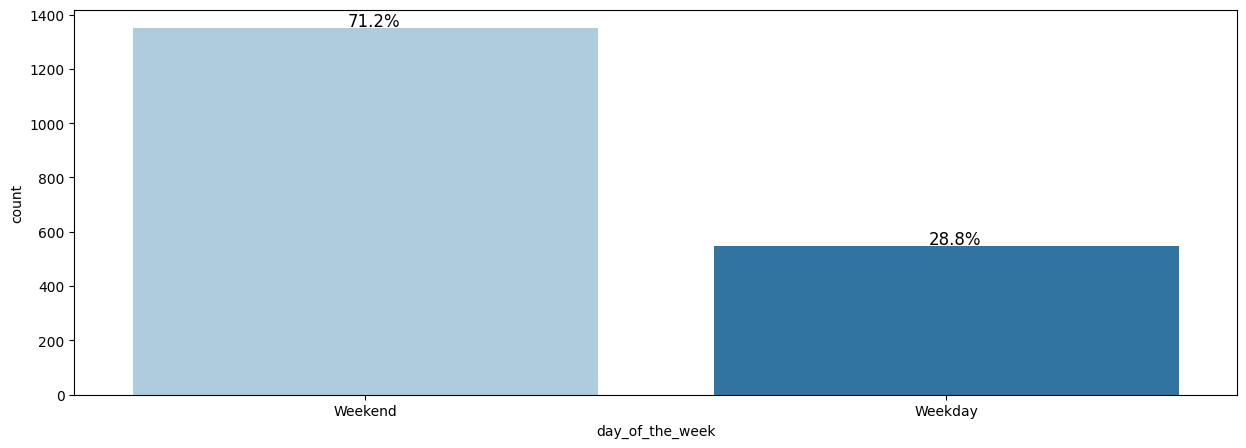

In [ ]:
bar_perc(df_copy,'day_of_the_week')

**Observation:**
* We observe 71% orders are placed on Weekends while 29% orders are placed on Weekdays.

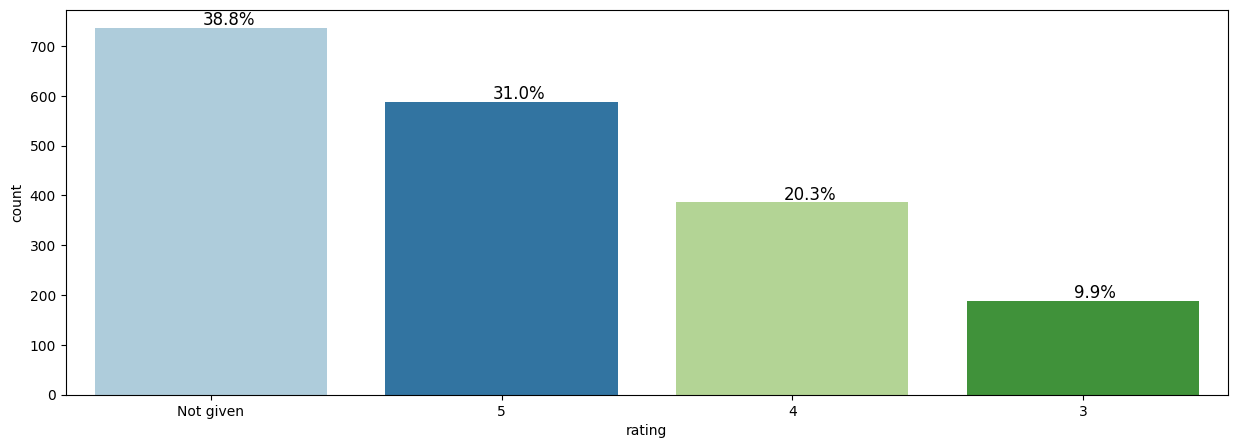

In [ ]:
bar_perc(df,'rating')

**Observation:**
* We observe 39% orders are not given any rating, 31% orders are rated 5, 20% orders are rated 4, and 10% orders are rated 3.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
#df.groupby(['restaurant_name'])['order_id'].size().sort_values(ascending=True)
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

**Observations:**
* The top 5 restaurants in terms of the number of orders received are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

In [ ]:
# Write the code here

df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

**Observations:**
* American cuisine the most popular on weekends.



In [ ]:
# Write the code here
df[df['cost_of_the_order']>20].shape[0]/df.shape[0]

0.2924130663856691

#### Observations: 29% of the orders cost more than 20 dollars.


In [ ]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:The mean order delivery time is 24.16 minutes.


In [ ]:
# Write the code here
df['customer_id'].value_counts(ascending = False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:The IDs of top 3 most frequent customers are 52832, 47440 and 83287. They placed 13, 10 and 9 orders respectively.


### Multivariate Analysis

###  Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)


<Axes: >

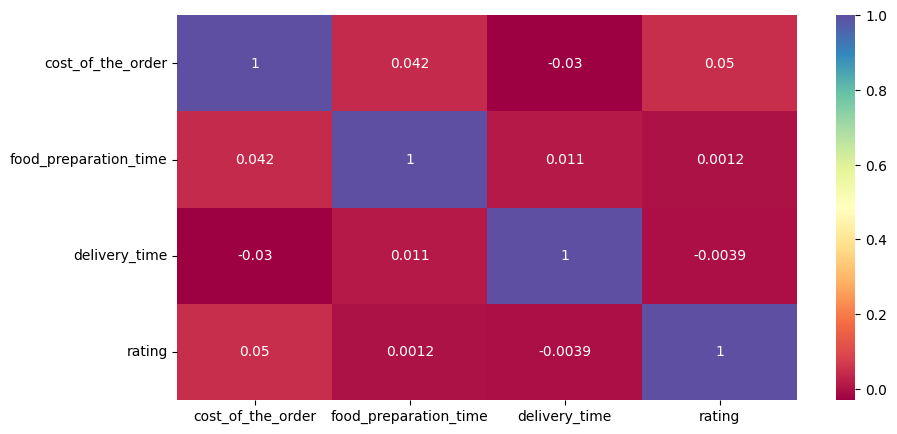

In [ ]:
# Write the code here
num_var = ['cost_of_the_order','food_preparation_time','delivery_time','rating']
corr = df_copy[num_var].corr()

# Plot the heatma
plt.figure(figsize = (10, 5))
sns.heatmap(corr, annot = True, cmap = 'Spectral',
        xticklabels = corr.columns,
        yticklabels = corr.columns)

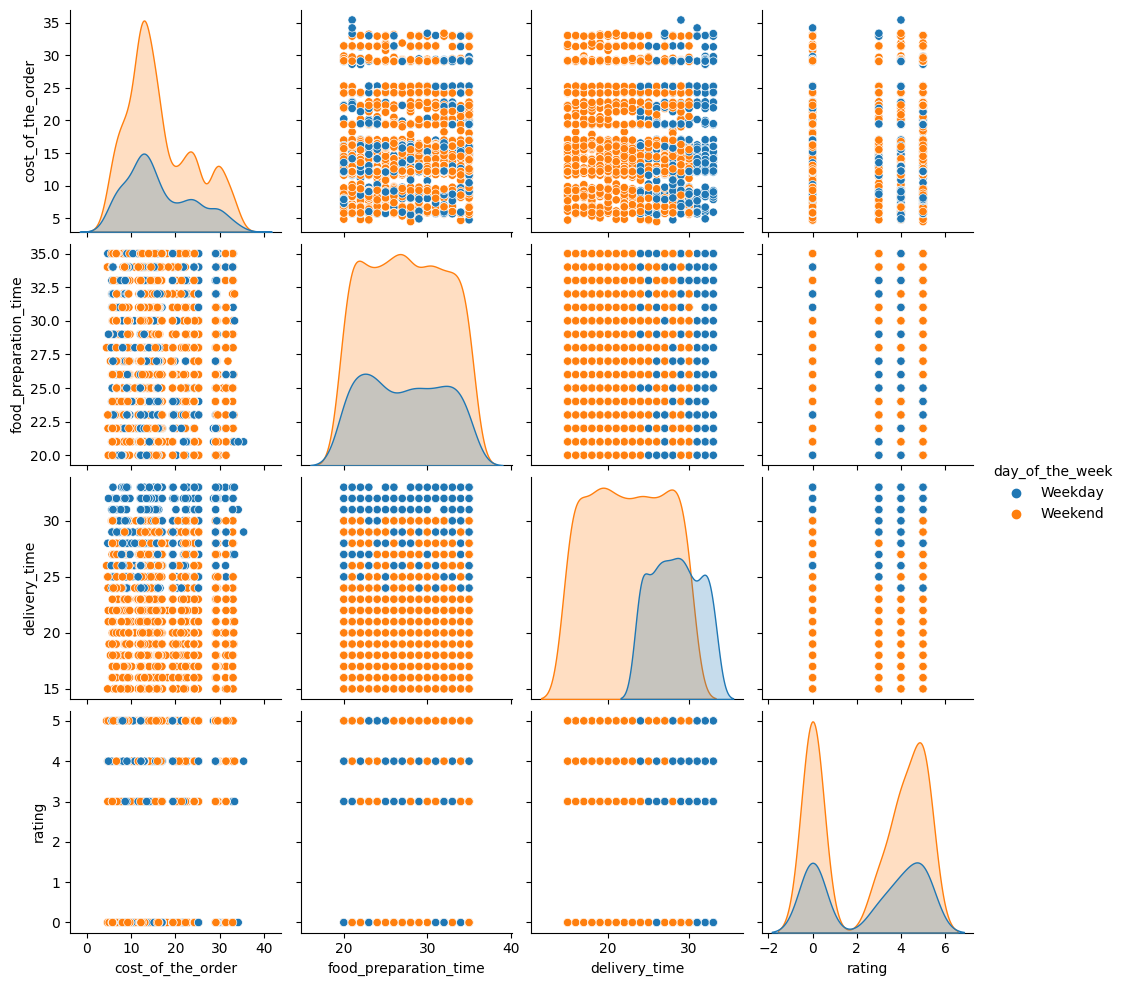

In [ ]:
sns.pairplot(data=df_copy, vars=num_var, hue='day_of_the_week');

**Observation:**
* Although we do not observe strong correlation among the food cost, rating, delivery time and food preparation time, we can still see there is possble negative association between delivery time and rating, delivery time and cost of the orders, and possible possitive associate between cost of order and rating. Customer ratings are affected by many aspects, the complexity of the correlation among variables prompt us to do more deep analysis.
* More people likely not give ratings or give high ratings on weekends than on weekdays.
* More customers gave ratings on weekends or gave high ratings if the delivery time is less than 25 mintues, indicating customers have less tolerance on delivery time on weekends.
* Customers gave high ratings(5) on weekdays only when food have faster prepartion time, while more customers still give rating 5 on weekends even though the food preparation time is longer. It indicates customers have less tolerance on delivery time but more tolerace on food preparation time on weekends.

In [ ]:
group_cnt1 = df_copy.groupby(['rating','restaurant_name']).size()
total_cnt1 = group_cnt1.groupby('rating').sum()

In [ ]:
rating_pct = ((group_cnt1/total_cnt1)*100).reset_index(name='number of ratings (%)')

In [ ]:
 rating_cnt = df_copy.groupby(['rating','restaurant_name']).size().reset_index(name = 'count')
 rating_df_final = pd.merge(rating_cnt,rating_pct, on = ['rating','restaurant_name']).sort_values(['rating', 'number of ratings (%)'],ascending = False)

In [ ]:
 plotDf = rating_df_final.groupby('rating').head(10)


In [ ]:
plotDf.head(10)

,rating,restaurant_name,count,number of ratings (%)
670,5.0,Shake Shack,60,10.204082
687,5.0,The Meatball Shop,53,9.013605
554,5.0,Blue Ribbon Fried Chicken,32,5.442177
555,5.0,Blue Ribbon Sushi,32,5.442177
655,5.0,RedFarm Broadway,18,3.061224
556,5.0,Blue Ribbon Sushi Bar & Grill,15,2.551020
656,5.0,RedFarm Hudson,15,2.551020
643,5.0,Parm,14,2.380952
600,5.0,Han Dynasty,13,2.210884
679,5.0,TAO,13,2.210884


<Figure size 1500x1000 with 0 Axes>

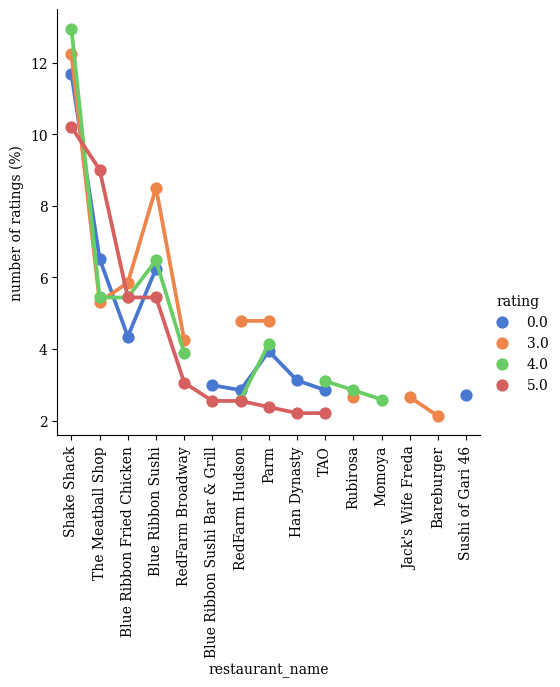

In [ ]:
plt.figure(figsize = (15, 10))
sns.catplot(data=plotDf, x="restaurant_name", y='number of ratings (%)', hue = 'rating', kind = 'point', palette='muted',order = plotDf['restaurant_name'].unique())
plt.xticks(rotation = 90)
plt.show()

**Observation:**
* The figure above lists the restaurants whose percentage of the number of rating ranks top 10 in total number of this rating group. For example, Shake Shack has 10% of total 5 score rating recevied by all resturants and ranks the 1st place in 5 score rating catergory.
* Similiary, Shake Shack also ranked 1st place in the 3 score rating catergory; Blue Ribbon Sushi and Parm has the 2nd and 3rd most 3 score rating among all restaurants with 3 score rating.

**Similarly, we compare cuisine types among each rating category:**

In [ ]:
group_cnt2 = df_copy.groupby(['rating','cuisine_type']).size()
total_cnt2 =group_cnt2.groupby('rating').sum()
rating_pct2 = ((group_cnt2/total_cnt2)*100).reset_index(name='number of ratings (%)').sort_values(['rating','number of ratings (%)'],ascending =False)
plotDf2 = rating_pct2.groupby('rating').head(10)
plotDf2.head()

,rating,cuisine_type,number of ratings (%)
42,5.0,American,29.591837
47,5.0,Japanese,24.149660
46,5.0,Italian,15.306122
43,5.0,Chinese,11.734694
45,5.0,Indian,5.442177


<Figure size 1500x1000 with 0 Axes>

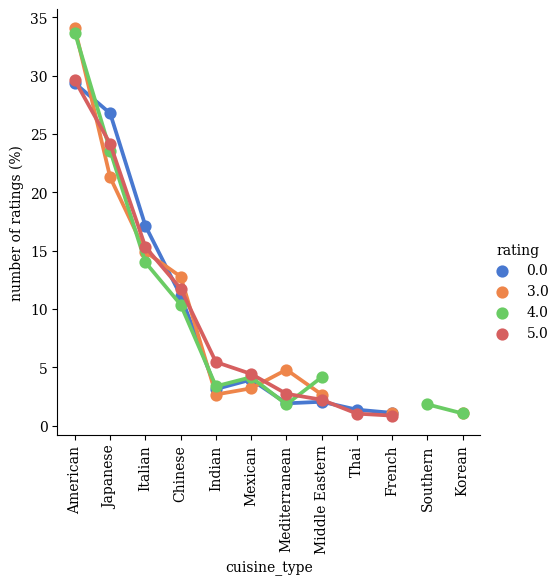

In [ ]:
plt.figure(figsize = (15, 10))
sns.catplot(data=plotDf2, x="cuisine_type", y='number of ratings (%)', hue = 'rating', kind = 'point', palette='muted',order = plotDf2['cuisine_type'].unique())
plt.xticks(rotation = 90)
plt.show()

**Observation:**
* We summarized the top 10 cuisines that received the most ratings in each rating category. Most cuisines shown here with larger number of highest rating scores are aso with the larger number of lowest rating scores.
* We observed American cuisine received 30% of the 5 score ratings, ranking the 1st in all cuisines with 5 score rating; however, it is also the cuisine received the most 3 score and 4 core rating among their respective rating categories.
* The kink on the orange dots where Mediterranean and Indian cuisines lies indicates that Indian cuisines received more 5 score ratings than 3 score ratings in their respective rating categories; Mediterranean food received more 3 score ratings than 4 or 5 score ratings in their respective rating categories.

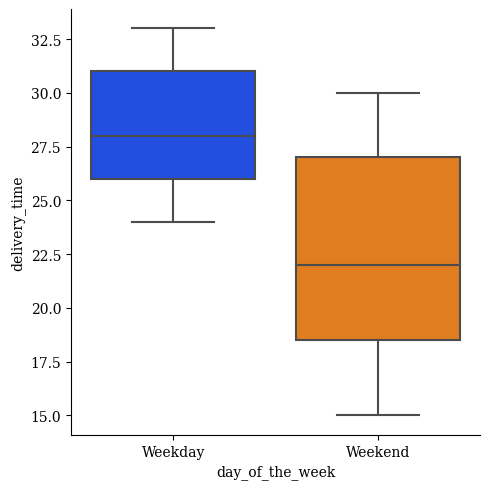

In [ ]:
sns.catplot(data=df_copy, x='day_of_the_week', y="delivery_time", kind='box', palette='bright');

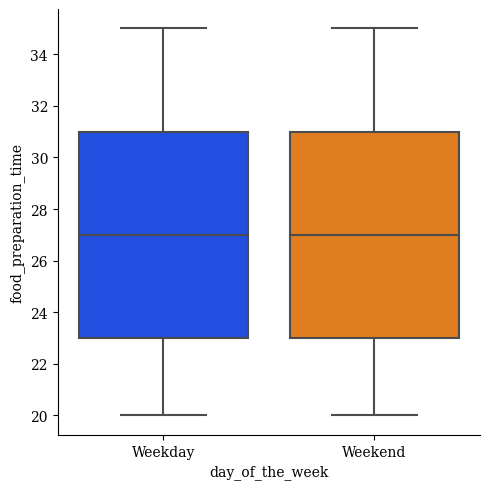

In [ ]:
sns.catplot(data=df_copy, x='day_of_the_week', y="food_preparation_time", kind='box', palette='bright');


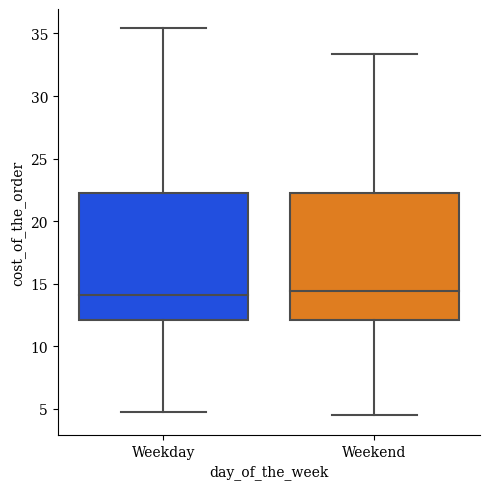

In [ ]:
sns.catplot(data=df_copy, x='day_of_the_week', y="cost_of_the_order", kind='box', palette='bright');


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   restaurant_name        1898 non-null   category
 1   cuisine_type           1898 non-null   category
 2   cost_of_the_order      1898 non-null   float64 
 3   day_of_the_week        1898 non-null   category
 4   rating                 1898 non-null   float64 
 5   food_preparation_time  1898 non-null   int64   
 6   delivery_time          1898 non-null   int64   
 7   total_time             1898 non-null   int64   
dtypes: category(3), float64(2), int64(3)
memory usage: 87.9 KB


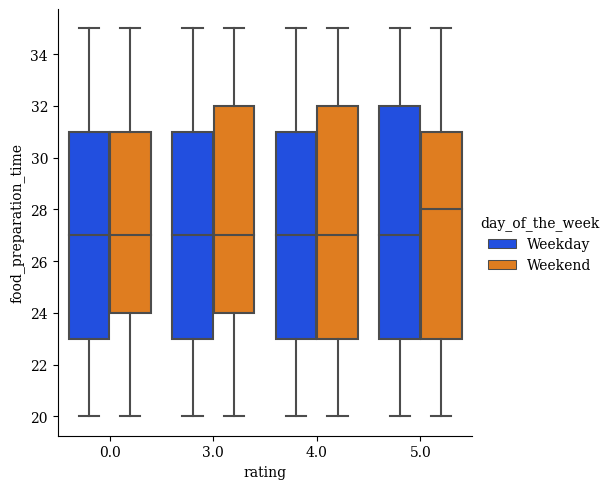

In [ ]:
sns.catplot(data=df_copy, x="rating", y="food_preparation_time", hue="day_of_the_week",  kind='box',palette='bright');


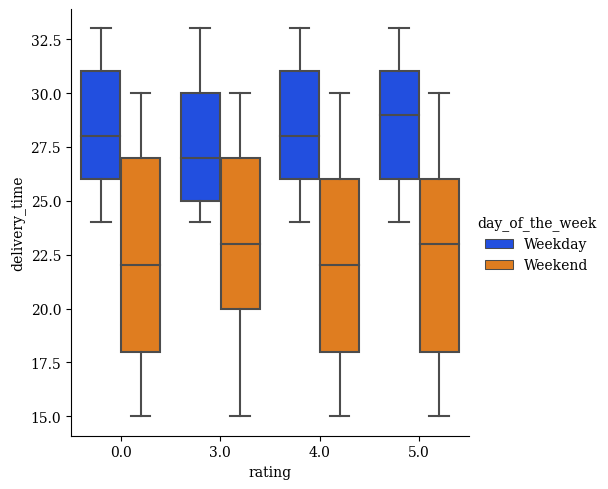

In [ ]:
sns.catplot(data=df_copy, x="rating", y="delivery_time", hue="day_of_the_week",  kind='box', palette='bright');

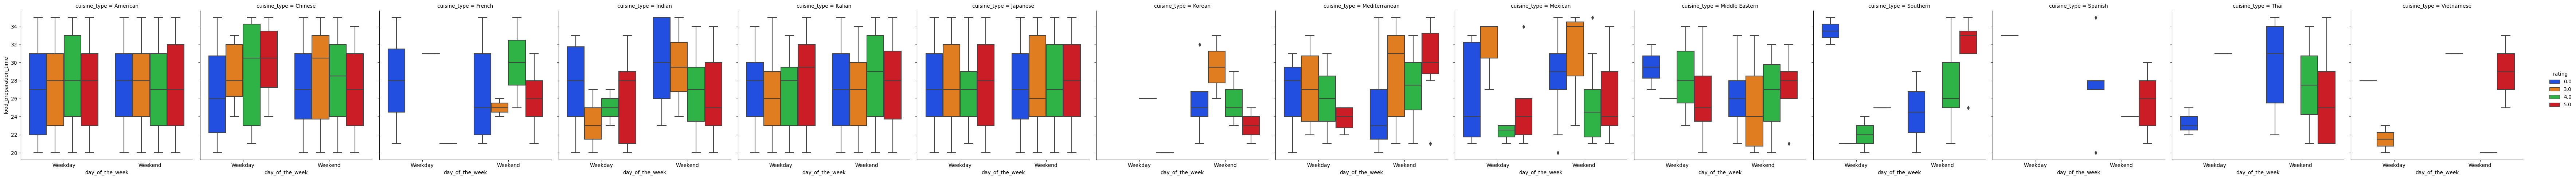

In [ ]:
sns.catplot(data=df_copy, x="day_of_the_week", y="food_preparation_time", hue="rating", col="cuisine_type", kind='box', palette='bright');


**Observation:**
* On weekends, the longer delivery time and longer food preparation time associated with low rating scores;
* During weekdays, however, it appears the longer delivery time associated with higher rating scores.
* we observe Mexican, Mediterranean, and Indian food has longer preparation time during weekends than during weekdays

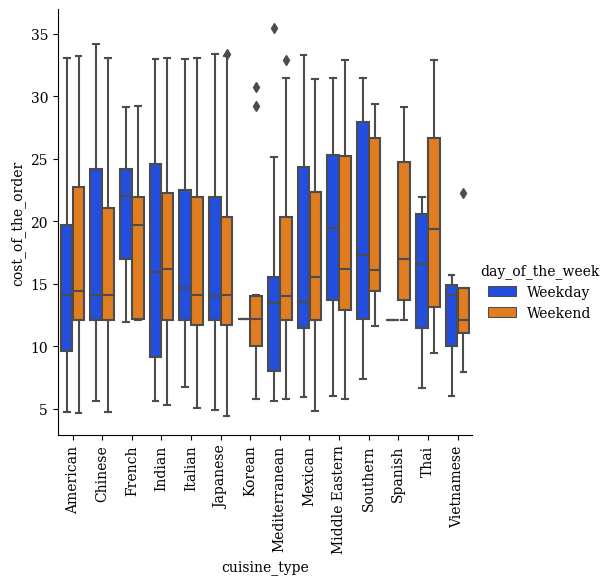

In [ ]:
g= sns.catplot(data=df_copy, x="cuisine_type", y="cost_of_the_order", hue="day_of_the_week", kind='box', palette='bright');
for row_axes in g.axes:
    for ax in row_axes:
       ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


**Observation:**
* There are more outliers of food costs on certain types of cuisines on weekends than weekdays. In general, Mediterranean food, American food, Spanish food and Thai food are usually more expensive on weekends, indicating these types of food might have higher demand during weekends.
* French food is more expensive on weekdays,indicating French food might have higher demand during weekdays.

###  The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
# Write the code here
df2 = df_copy[df_copy['rating']!=0] # remove ratings thats not given.
df3 = df2.groupby('restaurant_name')['rating'].agg(['count','mean'])
df3[(df3['count']>50) & (df3['mean']>4)]

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


####Observation: Four restaurants, Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack and The Meatball Shop have a rating count of more than 50 and the average rating of greater than 4

### The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
# Write the code here
def rev(cost):
    if cost > 20:
        return cost * 0.25
    elif cost > 5:
        return cost * 0.15
    else:
        return 0

df['revenue'] = df['cost_of_the_order'].apply(rev)

net_revenue = df['revenue'].sum()

net_revenue

6166.303

#### Observations: The net revenue generated by the company across all orders is $6166.303.


### The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Write the code here
df_copy['total_time'] = df['food_preparation_time'] + df['delivery_time']

orders_over_60 = df_copy[df_copy['total_time'] > 60].shape[0]

percentage_orders_over_60 = (orders_over_60 / df.shape[0]) * 100
percentage_orders_over_60

10.537407797681771

#### Observations: 10.5% of orders take more than 60 minutes to get delivered from the time the order is placed


### The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Write the code here
df.groupby('day_of_the_week')['delivery_time'].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
The mean delivery time during weekdays and weekends are 28.34 minutes and 22.47 minutes respectively.

### Conclusion and Recommendations

### Conclusions:
We analyzed a dataset from a food aggregator company FoodHub containing nearly 2000 food orders infomation. These orders come from 178 restaurants, 14 cuisine types across different days of the week. The purpose of the analysis is to understand the demands of the restaurants and their customers, and help foodHub improve the food delivery effiency and enhancing customer experience.

We have been able to conclude that:
* from the restaurant perspective:
1. Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 most popular restaurants where 1/3 of the entire orders come from.
2. Shake Shack, The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken also have the most rating counts, the highest average ratings and the most 5 score ratings, indicating these 4 resturants are not only popular in terms of orders but also with positive customer experience. Blue Ribbon Sushi and Parm, received significantly more 3 score ratings than 4 or 5 score ratings among the respective rating catogories.

* from the cuisine type perspective:
1. The top 6 most popular cuisines in terms of order amounts are American, Japanese, Italian, Chinese, Mexican and Indian food,  which cover almost 90% of all the cuisine types.
2. The top 6 most popular cuisines also received the most ratings in each rating category, and the most 5 score ratings.
3. The most popular cuisines also received the most number of ratings, with the most high rating scores and lowest rating scores among their respective rating categories.
4. Nearly 40% of customers do not give any ratings.

* from the service day perspective:

1. During weekend, there are almost 2.5 times of order amount than food orders in weekdays.
2.  There are more outliers of food costs on certain types of cuisines on weekends than weekdays, and in general, Mediterranean food, American food, Spanish food and Thai food are more expensive during weekends than weekdays, indicating certain types of cuisines have higher demands on weekends.
3. Although we do not observe significant difference on food preparation time between weekdays and weekends in general, we observe Mexican, Mediterranean, and Indian food has longer preparation time during weekends than during weekdays, indicating these types of cuisines might have higher demand on weekends.
4. On average, food delivery takes longer during weekdays than  weekends, although there are less orders in weekdays, indicating traffic could be the reason for delivery delay during weekdays.
5. Longer delivery time and food preparation time is associated with lower rating scores;



### Recommendations:
1. Business should focus on Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm restaurants, which are the most popular restaurants with highest customer demands. Try to discover the underlying reasons affecting customer experience on Blue Ribbon Sushi and Parm.
2. Business focus on improving customer experience on American, Japanese, Italian, Chinese, Mexican and Indian food, which are the most popular cuisines and the potential future marketing directions.
3. Develop marketing incentives to encourage customers to rate the services on the app.
4. Hire more employee to do weekend deliveries, because there are much more weekend orders, and longer delivery time is associated with lower customer ratings on weekends. Assign more employee to focus on delivering Amreican, Mediterranean, Mexican and Indian foods, as analysis indicated that these popular cuisines have higher demands on weekends.
5. On weekday, assign people who are close to the delivery desitination to avoid the traffic, and to make the delivery service more efficent.
